# Treinar um modelo na pratica

In [2]:
from sklearn.datasets import load_boston
data = load_boston()

In [3]:
data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
X = data.data
y = data.target

In [6]:
import pandas as pd
df = pd.DataFrame(X, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [10]:
list(zip(y_test[:5], reg.predict(X_test)[:5]))
# comparando y test com os previstos.

[(23.6, 28.53469468972978),
 (32.4, 36.61870059768805),
 (13.6, 15.637510787533703),
 (22.8, 25.501449600490076),
 (16.1, 18.709673401984894)]

# Limites do modelo linear na pratica

In [20]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error

In [18]:
reg = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [22]:
# comparing test and prediction's first row
print(pred[0])
print(y_test[0])
# RMSE scoring
print("RMSE = {}".format(mean_squared_error(y_test, pred, squared=False)))

18.670386266094418
23.6
RMSE = 5.688133723839556


LSTAT <= 7.865 AND RM <= 7.43

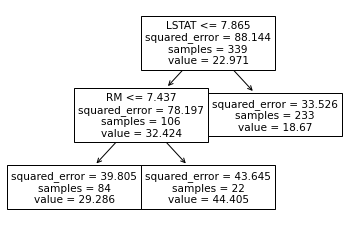

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(reg, feature_names=data.feature_names)
plt.show()

In [24]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Modelos de regressao nao linear na pratica

In [25]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [26]:
[(23.6, 28.534694689729807),
 (32.4, 36.618700597688),
 (13.6, 15.637510787533738),
 (22.8, 25.501449600489927),
 (16.1, 18.709673401984986)]


[(23.6, 28.534694689729807),
 (32.4, 36.618700597688),
 (13.6, 15.637510787533738),
 (22.8, 25.501449600489927),
 (16.1, 18.709673401984986)]

In [29]:
list(zip(y_test[:5], regr.predict(X_test)[:5]))

[(23.6, 21.671327670824876),
 (32.4, 30.94542167907488),
 (13.6, 15.900341866366878),
 (22.8, 23.356410674337468),
 (16.1, 16.674102300858905)]

# Exemplos de métricas com scikit-learn na pratica

In [30]:
from sklearn.metrics import mean_absolute_error
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_pred))

4.583524725998804
4.21708530989968


In [31]:
y_train_pred = regr.predict(X_train)
y_pred = regr.predict(X_test)
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_pred))

1.9659755049243068
2.4404557227148667


In [32]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_train_pred, squared=False))
print(mean_squared_error(y_test, y_pred, squared=False))

2.6175984946198314
3.5664655608103097


In [33]:
regr.score(X_train, y_train)

0.9222659143854919

In [34]:
regr.score(X_test, y_test)

0.8319248506611423

In [39]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_pred))
r2_score(y_test, y_pred)

0.9222659143854919


0.8319248506611423

In [40]:
import numpy as np
np.mean(y)

22.532806324110677